#LSTM


 بسم الله الرحمن الرحيم 

##Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Mounting Drive


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/mainDataset/newsDataset.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   25000 non-null  int64 
 1   name         25000 non-null  object
 2   url          25000 non-null  object
 3   title        25000 non-null  object
 4   article      25000 non-null  object
 5   kidFriendly  25000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
dataset

,Unnamed: 0,name,url,title,article,kidFriendly
0,0,Science News for Students,https://www.sciencenewsforstudents.org/article...,Cool Jobs: Sports science,A teenager wearing a white leotard emblazoned ...,1
1,1,ROBINAGE,https://www.robinage.com/books--nooks/dont-flu...,Don't Flush,If you think poo and wee is disgusting and not...,1
2,2,DOGO News,https://www.dogonews.com/2011/9/22/this-friday...,This Friday - Watch Out For The Satellite Debr...,"Over the years, we have sent so many irretriev...",1
3,3,Atlantic,Not Found,"Rex Tillerson Says Climate Change Is Real, but …","As chairman and CEO of ExxonMobil, Rex Tillers...",0
4,4,ROBINAGE,https://www.robinage.com/recipes/cheese-parant...,Cheese Parantha,What You Need: For the Parantha\nWheat flour -...,1
...,...,...,...,...,...,...
24995,24995,Time for Kids,http://tfk.news/3vpxnQR,It's #WafflesAndMochi day! TFK Kid Reporter Be...,"Take two puppets, add former First Lady Michel...",1
24996,24996,CNN,Not Found,Obama comes face to face with burdens of 9/11 ...,(CNN) President Barack Obama came face to fac...,0
24997,24997,Atlantic,Not Found,The New Reality TV,"“Reality seems tired. It seems derivative,” a ...",0
24998,24998,DOGO News,https://www.dogonews.com/2010/5/8/a-heavenly-t...,This Mother's Day - Reach For The Stars!,Photo Credit: imothersday.net If you are stil...,1


##Data visualization

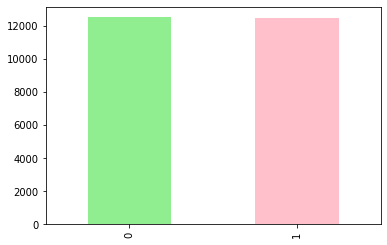

In [ ]:
dataset.kidFriendly.value_counts().plot.bar(color=['lightgreen', 'pink'])

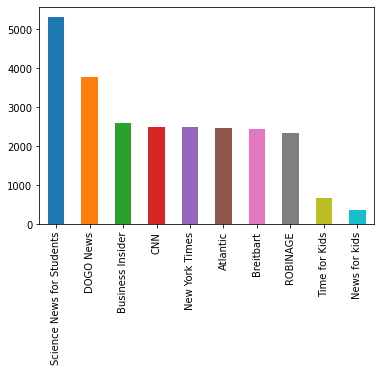

In [ ]:
dataset.name.value_counts().plot.bar(color=['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10'])

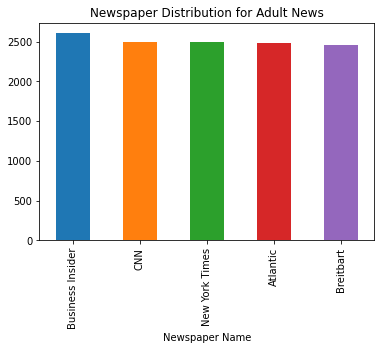

In [ ]:
temp = dataset.query('kidFriendly == 0')
temp.name.value_counts().plot.bar(color=['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10'],title='Newspaper Distribution for Adult News', xlabel='Newspaper Name')

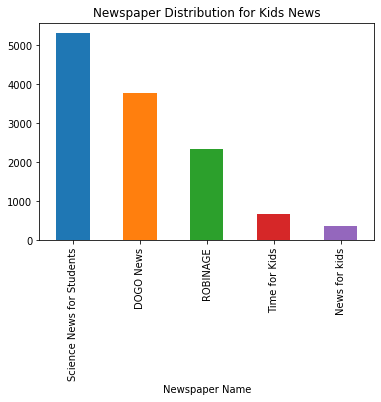

In [ ]:
temp2 = dataset.query('kidFriendly == 1')
temp2.name.value_counts().plot.bar(color=['C0', 'C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10'],title='Newspaper Distribution for Kids News', xlabel='Newspaper Name')

In [ ]:
ind = dataset.index[dataset['article'].apply(lambda x: len(str(x).split())) <50 ]

In [ ]:
dataset.loc[12389]

Unnamed: 0                                                 12389
name                                            Business Insider
url                                                    Not Found
title          Hillary Clinton wins Puerto Rico Democratic pr...
article        ’’ ”SAN JUAN, Puerto Rico (AP)    Hillary Clin...
kidFriendly                                                    0
Name: 12389, dtype: object

In [ ]:
ind

Int64Index([], dtype='int64')

In [ ]:
article_len = dataset['article'].astype(str).apply(len)
word_count = dataset['article'].apply(lambda x: len(str(x).split()))

In [ ]:
article_len1 = temp['article'].astype(str).apply(len)
word_count1 = temp['article'].apply(lambda x: len(str(x).split()))

In [ ]:
article_len2 = temp2['article'].astype(str).apply(len)
word_count2 = temp2['article'].apply(lambda x: len(str(x).split()))

In [ ]:
print(min(article_len1))
print(max(article_len1))
print(min(word_count1))
print(max(word_count1))

print(min(article_len2))
print(max(article_len2))
print(min(word_count2))
print(max(word_count2))

507
74920
100
9639
504
29735
100
5249


In [ ]:
dataset = dataset.dropna(subset=['article'])

In [ ]:
dataset.loc[758].article

'An Arizona Republican senator, who was most adamantly opposed to   Donald J. Trump, is in for a tough reelection campaign in 2018, according to a Remington Research Group poll. The poll was conducted Nov. 15 and Nov. 16 with 1, 122 likely Republican primary voters in that state and carries a 2. 93 percent margin of error. [“Jeff Flake is currently in a very precarious position,” said Titus Bond, director of Remington Research Group. “The data show that Flake’s image amongst Republican primary voters is in bad shape and that carries over to the ballot where he only realizes 35 percent support on the high end. It remains early but he is certainly the most vulnerable incumbent to a primary challenge. ”  The data show that Donald Trump is popular amongst Arizona’s Republican primary electorate.   percent hold a favorable view of the   while only 10 percent view him unfavorably, Bond said. Flake is viewed unfavorably by roughly half of Republicans. Thirty percent view Flake favorably, whil

In [ ]:
dataset.query('article == ""')

,Unnamed: 0,name,url,title,article,kidFriendly


In [ ]:
article_len

0        13915
1         1243
2         1838
3         5784
4          878
         ...  
24995      744
24996     7810
24997     7606
24998     1233
24999     2898
Name: article, Length: 25000, dtype: int64

In [ ]:
word_count

0        2353
1         207
2         311
3         965
4         154
         ... 
24995     119
24996    1355
24997    1287
24998     211
24999     459
Name: article, Length: 25000, dtype: int64

In [ ]:
min(article_len)

504

In [ ]:
max(article_len)

74920

In [ ]:
min(word_count)

100

In [ ]:
max(word_count)

9639

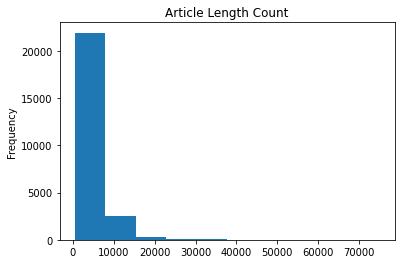

In [ ]:
article_len.plot(
    kind = 'hist',
    xlabel = 'article_length',
    ylabel = 'count',
    title='Article Length Count')

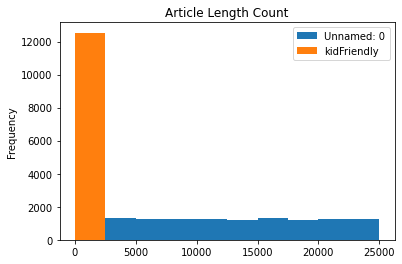

In [ ]:
temp.plot(
    kind = 'hist',
    xlabel = 'article_length',
    ylabel = 'count',
    title='Article Length Count')

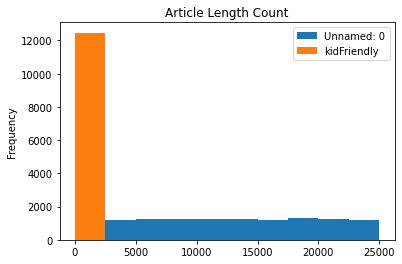

In [ ]:
temp2.plot(
    kind = 'hist',
    xlabel = 'article_length',
    ylabel = 'count',
    title='Article Length Count')

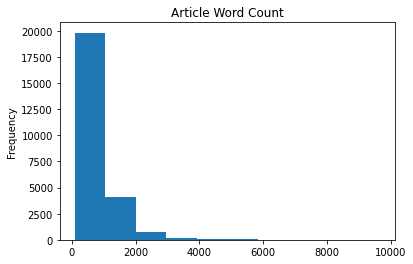

In [ ]:
word_count.plot(
    kind = 'hist',
    xlabel = 'word_count',
    ylabel = 'count',
    title='Article Word Count')

##Text Cleaning

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

for i in range(0, 25000):
 text = re.sub('[^a-zA-Z]',' ',str(dataset['article'][i]))
 text = text.lower()
 text = text.split()
 ps = PorterStemmer()
 text=[ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
 text = ' '.join(text)
 corpus.append(text)
 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(corpus)

25000

In [ ]:
dataset['article'] = corpus

In [ ]:
dataset.article

In [ ]:
from collections import Counter
def counter_word(text):
  count = Counter()
  for i in text.values:
    for word in i.split():
      count[word] += 1
  return count

In [ ]:
text = dataset.article
counter = counter_word(text)

In [ ]:
len(counter)

73112

In [ ]:
counter

In [ ]:
num_words =  1000   
max_length = 20

In [ ]:
X =  dataset.iloc[:, 4].values
y = dataset.iloc[:, 5].values

##Train Test Validation Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.20, random_state=1)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
X_test, X_valid, y_test, y_valid  = train_test_split(X_test, y_test, test_size=0.50, random_state=1) 

In [ ]:
X_train.shape

(20000,)

In [ ]:
X_test.shape

(2500,)

In [ ]:
X_valid.shape

(2500,)

##Tokenization


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)      

In [ ]:
word_index = tokenizer.word_index

In [ ]:
word_index

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)

In [ ]:
len(X_train_seq)

20000

##Padding

In [ ]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(
    X_train_seq, maxlen=max_length, padding="post", truncating="post"
)

In [ ]:
train_padded[0]

array([ 21,   4, 700, 854, 378, 616, 389,  15, 404,  76, 590,   4,  13,
       602, 114, 147, 140, 734, 377, 223], dtype=int32)

In [ ]:
X_test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(
    X_test_seq, maxlen=max_length, padding="post", truncating="post"
)

In [ ]:
X_valid_seq = tokenizer.texts_to_sequences(X_valid)
valid_padded = pad_sequences(
    X_valid_seq, maxlen=max_length, padding="post", truncating="post"
)

In [ ]:
print(len(X_train[2]))
print(len(X_train_seq[2]))

2544
216


In [ ]:
print(f"Shape of train {train_padded.shape}")
print(f"Shape of test {test_padded.shape}")
print(f"Shape of test {valid_padded.shape}")

Shape of train (20000, 20)
Shape of test (2500, 20)
Shape of test (2500, 20)


In [ ]:
kids = 0
ad = 0
for x in y_train:
  if x == 0:
    kids = kids+1
  else:
    ad = ad+1 

kids2 = 0
ad2 = 0
for x in y_test:
  if x == 0:
    kids2 = kids2+1
  else:
    ad2 = ad2+1 

kids3 = 0
ad3 = 0
for x in y_valid:
  if x == 0:
    kids3 = kids3+1
  else:
    ad3 = ad3+1 

In [ ]:
print(kids)
print(ad)
print(kids2)
print(ad2)
print(kids3)
print(ad3)

10031
9969
1263
1237
1238
1262


##Sequential Model

In [ ]:
import tensorflow
from keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras import losses
from keras.layers import Embedding, LSTM, Dense, Dropout, Flatten
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Embedding(num_words, 16, input_length=max_length,\
                                    embeddings_regularizer = regularizers.l2(0.005)))
model.add(LSTM(16,recurrent_dropout=0.2,return_sequences=True))

model.add(Flatten())

model.add(Dense(1, activation="sigmoid"))


optimizer = Adam(learning_rate=3e-4)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="auto", patience = 5, 
                                        restore_best_weights = True)

##Training

In [ ]:
history = model.fit(
    train_padded, y_train, epochs=11, validation_data=(test_padded, y_test),callbacks = [earlystopping]
)

Epoch 1/11
625/625 [==============================] - 10s 12ms/step - loss: 0.3545 - accuracy: 0.8755 - val_loss: 0.1931 - val_accuracy: 0.9356
Epoch 2/11
625/625 [==============================] - 7s 12ms/step - loss: 0.1733 - accuracy: 0.9493 - val_loss: 0.1773 - val_accuracy: 0.9436
Epoch 3/11
625/625 [==============================] - 8s 12ms/step - loss: 0.1556 - accuracy: 0.9531 - val_loss: 0.1731 - val_accuracy: 0.9416
Epoch 4/11
625/625 [==============================] - 7s 11ms/step - loss: 0.1476 - accuracy: 0.9561 - val_loss: 0.1622 - val_accuracy: 0.9476
Epoch 5/11
625/625 [==============================] - 7s 11ms/step - loss: 0.1428 - accuracy: 0.9577 - val_loss: 0.1660 - val_accuracy: 0.9472
Epoch 6/11
625/625 [==============================] - 7s 11ms/step - loss: 0.1393 - accuracy: 0.9584 - val_loss: 0.1661 - val_accuracy: 0.9476
Epoch 7/11
625/625 [==============================] - 7s 11ms/step - loss: 0.1355 - accuracy: 0.9594 - val_loss: 0.1646 - val_accuracy: 0.948

##Training loss VS Validation loss

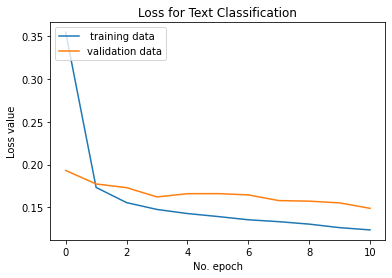

In [ ]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

##Training accuracy VS Validation accuracy

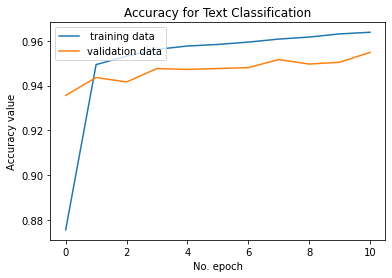

In [ ]:
plt.plot(history.history['accuracy'], label=' training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

##Depictions


In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 20, 16)            16000     
                                                                 
 lstm_21 (LSTM)              (None, 20, 16)            2112      
                                                                 
 flatten_20 (Flatten)        (None, 320)               0         
                                                                 
 dense_56 (Dense)            (None, 1)                 321       
                                                                 
Total params: 18,433
Trainable params: 18,433
Non-trainable params: 0
_________________________________________________________________


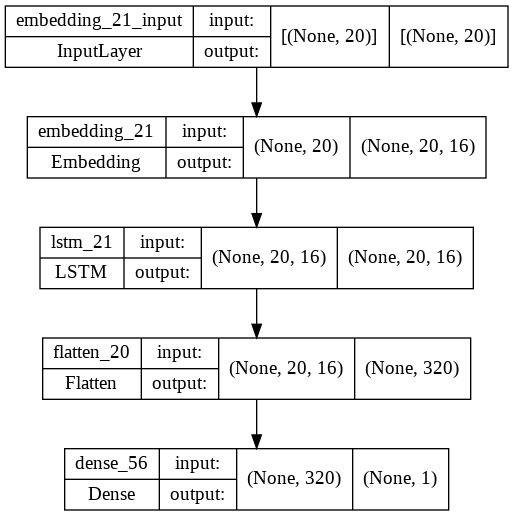

In [ ]:
tensorflow.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

##Evaluation

In [ ]:
results0 = model.evaluate(train_padded,y_train)

625/625 [==============================] - 3s 4ms/step - loss: 0.1054 - accuracy: 0.9742


In [ ]:
results = model.evaluate(test_padded,y_test)

79/79 [==============================] - 0s 4ms/step - loss: 0.1489 - accuracy: 0.9548


In [ ]:
results2 = model.evaluate(valid_padded,y_valid)

79/79 [==============================] - 0s 4ms/step - loss: 0.1379 - accuracy: 0.9616


In [ ]:
p_pred = model.predict(test_padded)
p_pred = p_pred.flatten()
print(p_pred.round(2))
# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)
print(y_pred)

[0.   0.81 0.01 ... 0.03 0.   0.59]
[0 1 0 ... 0 0 1]


In [ ]:
p_pred2 = model.predict(valid_padded)
p_pred2 = p_pred2.flatten()
print(p_pred2.round(2))
# extract the predicted class labels
y_pred2 = np.where(p_pred2 > 0.5, 1, 0)
print(y_pred2)

[0.01 0.99 1.   ... 0.   0.07 1.  ]
[0 1 1 ... 0 0 1]


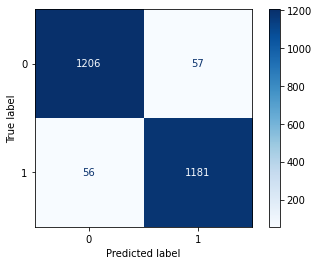

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

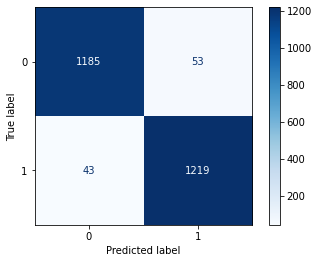

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm2 = confusion_matrix(y_valid, y_pred2)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

disp2.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1263
           1       0.95      0.95      0.95      1237

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500



In [ ]:
from sklearn.metrics import classification_report
report2 = classification_report(y_valid, y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1238
           1       0.96      0.97      0.96      1262

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500

